In [1]:
import numpy as np
import pandas as pd
import lightkurve as lk
import matplotlib.pyplot as plt


In [2]:
search_result=lk.search_targetpixelfile('HAT-P-24', mission='TESS', sector=33, exptime=120)
#search_result
tpf = search_result[0].download()
#tpf.plot()

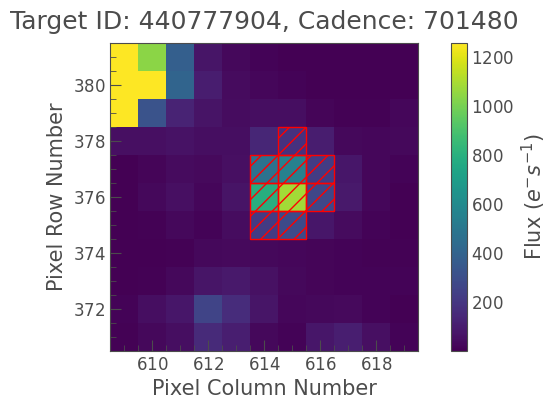

In [3]:
lc_1_tpf = tpf.to_lightcurve(aperture_mask="pipeline")
tpf.plot(aperture_mask="pipeline")
plt.show()

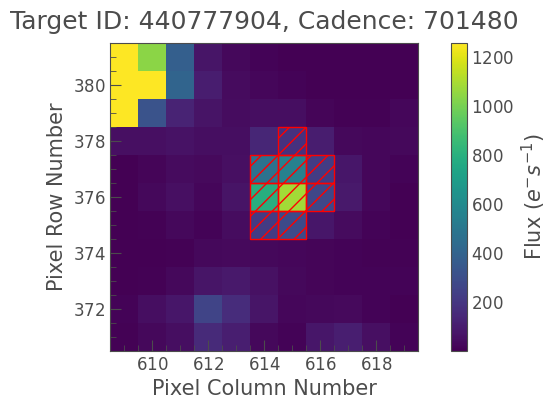

In [4]:
lc_2_tpf = tpf.to_lightcurve(aperture_mask = 'threshold')
tpf.plot(aperture_mask="threshold")
plt.show()

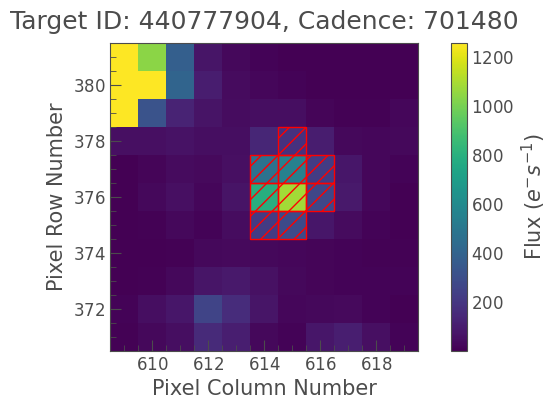

In [5]:
cut_mask = np.zeros(tpf[0].shape[1:], dtype='bool')

cut_mask[4,6] = True
cut_mask[4,5] = True

cut_mask[5,5] = True
cut_mask[5,6] = True
cut_mask[5,7] = True

cut_mask[6,5] = True
cut_mask[6,6] = True
cut_mask[6,7] = True

cut_mask[7,6] = True

lc_3_tpf = tpf.to_lightcurve(aperture_mask = cut_mask)
tpf.plot(aperture_mask = cut_mask)
plt.show()

In [6]:
background_mask = ~tpf.pipeline_mask
lc_bkg_tpf = tpf.to_lightcurve(aperture_mask = background_mask)

custom_pipeline = tpf.pipeline_mask
custom_threshold = tpf.create_threshold_mask(threshold=3)

bkg_per_pix = tpf.to_lightcurve(aperture_mask = background_mask)/background_mask.sum()

fon_obj_pip = bkg_per_pix * custom_pipeline.sum()
fon_obj_thr = bkg_per_pix * custom_threshold.sum()
fon_obj_cut = bkg_per_pix * cut_mask.sum()

cor_lc_pip = lc_1_tpf - fon_obj_pip.flux
cor_lc_thr = lc_2_tpf - fon_obj_thr.flux
cor_lc_cut = lc_3_tpf - fon_obj_cut.flux


In [7]:
lc_tpf_cor_1_LS = cor_lc_pip.to_periodogram(method='ls', minimum_period=1, maximum_period=5, 
                              oversample_factor=100)


In [8]:
lc_tpf_cor_2_LS  = cor_lc_thr.to_periodogram(method='ls', minimum_period=1, maximum_period=5, 
                              oversample_factor=100)


In [9]:
lc_tpf_cor_3_LS  = cor_lc_cut.to_periodogram(method='ls', minimum_period=1, maximum_period=5, 
                              oversample_factor=100)

In [11]:
lc_1_cor_phase = cor_lc_pip.fold(period = lc_tpf_cor_1_LS.period_at_max_power.value, 
                           epoch_time = 2069.55, epoch_phase=0, normalize_phase=True)
lc_tpf_cor_1_LS.period_at_max_power.value

3.437053905114756

In [12]:
lc_2_cor_phase = cor_lc_thr.fold(period = lc_tpf_cor_2_LS.period_at_max_power.value, 
                           epoch_time = 2069.55, epoch_phase=0, normalize_phase=True)
lc_tpf_cor_2_LS.period_at_max_power.value

3.437053905114756

In [13]:
lc_3_cor_phase = cor_lc_cut.fold(period = lc_tpf_cor_3_LS.period_at_max_power.value, 
                                 epoch_phase=0.5, normalize_phase=True)
lc_tpf_cor_3_LS.period_at_max_power.value

3.437053905114756